<a href="https://colab.research.google.com/github/Lavuri453/titanic-classification/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bharat Intern data science
Task-2
Project Name:Titanic Classification
Name:Lavuri Priyanka bai

Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Reading the DataSet

In [ ]:
df = pd.read_csv("/content/traintt.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.drop(columns=['Cabin'],axis=1,inplace=True)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [ ]:
Exploratory Data Analysis

Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

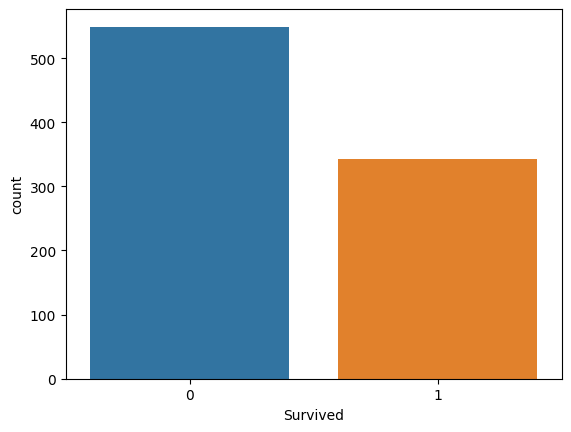

In [ ]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

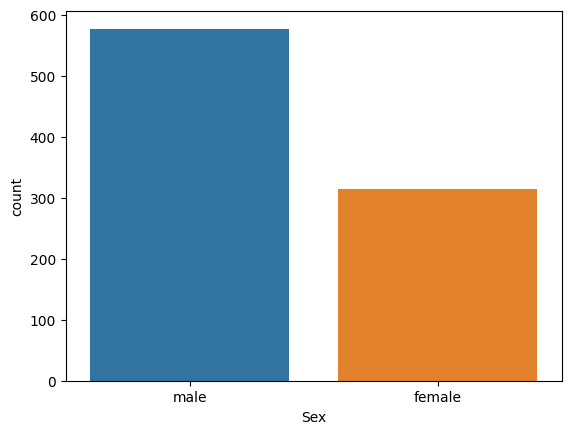

In [ ]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Age', ylabel='count'>

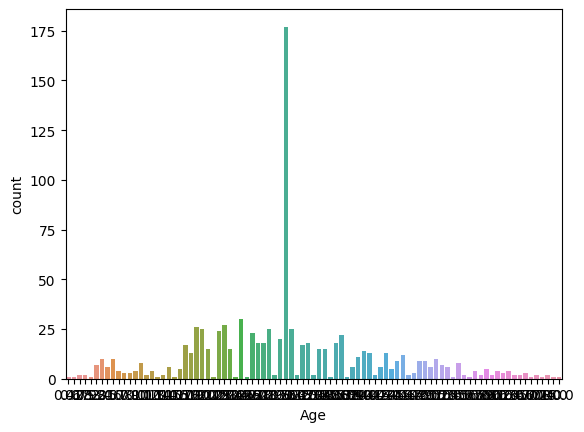

In [ ]:
sns.countplot(x='Age',data=df)

<Axes: xlabel='Survived', ylabel='count'>

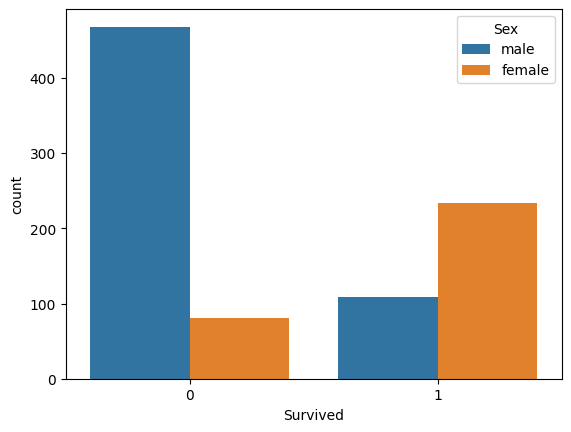

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

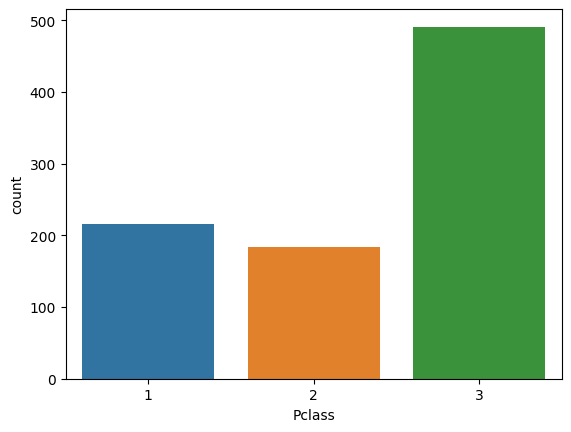

In [ ]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

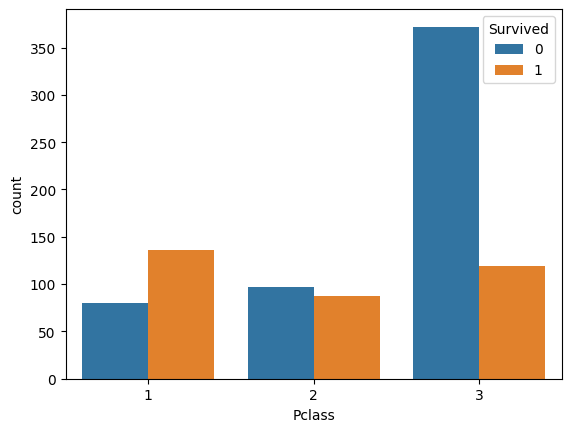

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [ ]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Logistic Regression

Split the data into Training set and testing set

In [ ]:
x = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = df['Survived']

Train and fit logistic regression model on the training set

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predictions and Evaluations

In [ ]:
predictions=logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[91  9]
 [30 49]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [ ]:
from sklearn.metrics import accuracy_score
test_data_accuracy=accuracy_score(y_test,predictions)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


THANK YOU